In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [594]:
dataset = pd.read_csv("files/loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,3+,Graduate,No,NaN,360.0,1.0,360.0,1.0,NaN,NaN
1,LP001003,NaN,Yes,NaN,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,NaN,0.0,NaN,360.0,1.0,NaN,Y
3,LP001006,Male,NaN,3+,Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [595]:
dataset.isnull().sum()

Loan_ID               0
Gender               14
Married               4
Dependents           16
Education             0
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         2
Loan_Status           1
dtype: int64

In [596]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            620 non-null    object 
 1   Gender             606 non-null    object 
 2   Married            616 non-null    object 
 3   Dependents         604 non-null    object 
 4   Education          620 non-null    object 
 5   Self_Employed      588 non-null    object 
 6   ApplicantIncome    618 non-null    float64
 7   CoapplicantIncome  620 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   606 non-null    float64
 10  Credit_History     570 non-null    float64
 11  Property_Area      618 non-null    object 
 12  Loan_Status        619 non-null    object 
dtypes: float64(5), object(8)
memory usage: 63.1+ KB


duplicate

In [597]:
duplicates =dataset.drop_duplicates()

removed = len(dataset)-len(duplicates)
print(f"remove duplicated rows : {removed}")

remove duplicated rows : 6


 ### Filling up misssing values ###

CoapplicantIncome

In [598]:
dataset['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2840.0      6
2083.0      5
2500.0      5
1666.0      5
         ... 
2524.0      1
2845.0      1
536.0       1
3906.0      1
6667.0      1
Name: count, Length: 288, dtype: int64

In [599]:
dataset.fillna({"CoapplicantIncome": dataset["CoapplicantIncome"].fillna(dataset["CoapplicantIncome"].mode()[0])},inplace=True)
dataset["CoapplicantIncome"].isnull().sum()


np.int64(0)

Loan_Amount_Term

In [600]:
dataset["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    518
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [601]:
dataset.fillna({"Loan_Amount_Term": dataset["Loan_Amount_Term"].mode()[0]},inplace=True)
dataset["Loan_Amount_Term"].isnull().sum()


np.int64(0)

In [602]:
for i in dataset:
    if dataset[i].dtype == "object":
        dataset[i] = dataset[i].fillna(dataset[i].mode()[0])
    if dataset[i].dtype == "float64":
        dataset[i] = dataset[i].fillna(dataset[i].mean())
dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Department

In [603]:
dataset["Dependents"] = dataset["Dependents"].replace("3+",3).astype(float)
dataset["Dependents"].dtype

dtype('float64')

Loan_Status

In [604]:
dataset["Loan_Status"] = dataset["Loan_Status"].replace("Y","Yes")
dataset["Loan_Status"] = dataset["Loan_Status"].replace("N","No")

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,3.0,Graduate,No,5378.867314,360.0,1.000000,360.0,1.0,Semiurban,Yes
1,LP001003,Male,Yes,0.0,Graduate,No,4583.000000,1508.0,128.000000,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0.0,Graduate,Yes,5378.867314,0.0,146.023411,360.0,1.0,Semiurban,Yes
3,LP001006,Male,Yes,3.0,Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0.0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Yes


Encoding catgorical data

In [605]:
encode = dataset.loc[:,["Gender","Married","Education","Self_Employed","Loan_Status"]]

In [606]:
pd.get_dummies(encode).head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Status_No,Loan_Status_Yes
0,False,True,True,False,True,False,True,False,False,True
1,False,True,False,True,True,False,True,False,True,False
2,False,True,False,True,True,False,False,True,False,True
3,False,True,False,True,True,False,True,False,False,True
4,False,True,True,False,True,False,True,False,False,True


In [607]:
one = OneHotEncoder(drop="first")

encoded_dta = one.fit_transform(encode).toarray()

encoded_dta
# OneHotEncoder turns data into sparse matrix meaning,0 or 1

array([[1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1.],
       ...,
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [608]:
dataset2 = pd.DataFrame(encoded_dta,columns=["Gender","Married","Education","Self_Employed","Loan_Status"])
dataset2.head()

,Gender,Married,Education,Self_Employed,Loan_Status
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


inserting these encoded data in original dataset

In [609]:
dataset.drop(["Gender","Married","Education","Self_Employed","Loan_Status"],axis=1,inplace=True)

In [610]:

dataset.insert(1,"Gender",dataset2["Gender"])
dataset.insert(2,"Married",dataset2["Married"])
dataset.insert(3,"Education",dataset2["Education"])
dataset.insert(4,"Self_Employed",dataset2["Self_Employed"])
dataset.insert(12,"Loan_Status",dataset2["Loan_Status"])


dataset.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,3.0,5378.867314,360.0,1.000000,360.0,1.0,Semiurban,1.0
1,LP001003,1.0,1.0,0.0,0.0,0.0,4583.000000,1508.0,128.000000,360.0,1.0,Rural,0.0
2,LP001005,1.0,1.0,0.0,1.0,0.0,5378.867314,0.0,146.023411,360.0,1.0,Semiurban,1.0
3,LP001006,1.0,1.0,0.0,0.0,3.0,2583.000000,2358.0,120.000000,360.0,1.0,Urban,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.000000,0.0,141.000000,360.0,1.0,Urban,1.0


Property_Area

In [611]:
dataset["Property_Area"].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [612]:
le = LabelEncoder()
dataset["Property_Area"] = le.fit_transform(dataset["Property_Area"])
dataset["Property_Area"]

0      1
1      0
2      1
3      2
4      2
      ..
615    0
616    0
617    2
618    2
619    1
Name: Property_Area, Length: 620, dtype: int64

Outlayer

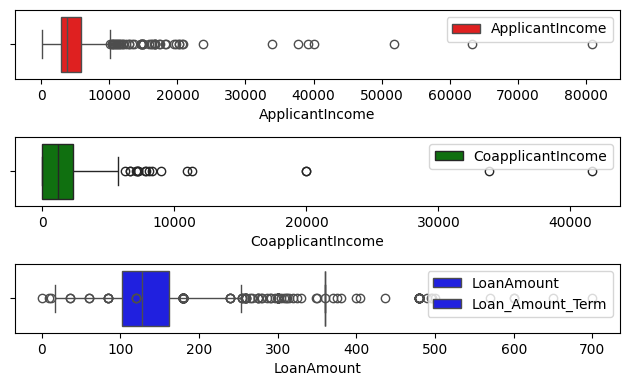

In [613]:
plt.subplot(4,1,1)
sns.boxplot(x=dataset["ApplicantIncome"],data=dataset,color="r",label="ApplicantIncome")

plt.subplot(4,1,2)
sns.boxplot(x=dataset["CoapplicantIncome"],data=dataset,color ="g",label="CoapplicantIncome") 

plt.subplot(4,1,3)
sns.boxplot(x=dataset["LoanAmount"],data=dataset,color="b",label="LoanAmount")

plt.subplot(4,1,3)
sns.boxplot(x=dataset["Loan_Amount_Term"],data=dataset,color="b",label="Loan_Amount_Term")


plt.tight_layout()
plt.show()


In [614]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

before = dataset.shape[0]

outlayer_data = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in outlayer_data:
    dataset = remove_outliers(dataset,outlayer_data )


after = dataset.shape[0]
print("Outliers removed:", before - after)

Outliers removed: 132


In [615]:
dataset["Loan_Status"] = dataset["Loan_Status"].astype(int)

In [616]:
dataset.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,488.000000,488.000000,488.000000,488.000000
mean,3675.223089,1354.573607,121.420993,345.368852
std,1375.575776,1370.287609,36.767396,62.449875
min,150.000000,0.000000,30.000000,12.000000
25%,2638.750000,0.000000,99.000000,360.000000
50%,3440.000000,1420.500000,120.000000,360.000000
75%,4583.000000,2253.250000,146.023411,360.000000
max,7451.000000,5625.000000,216.000000,480.000000


In [617]:
dataset.to_csv("files/cleaned_loan.csv",index=False)

dataset3 = pd.read_csv("files/cleaned_loan.csv")

dataset3.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1.0,0.0,0.0,0.0,4583.000000,1508.0,128.000000,360.0,1.0,0,0
1,LP001005,1.0,1.0,0.0,1.0,0.0,5378.867314,0.0,146.023411,360.0,1.0,1,1
2,LP001006,1.0,1.0,0.0,0.0,3.0,2583.000000,2358.0,120.000000,360.0,1.0,2,1
3,LP001008,1.0,0.0,0.0,0.0,0.0,6000.000000,0.0,141.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.000000,0.0,141.000000,360.0,1.0,2,1


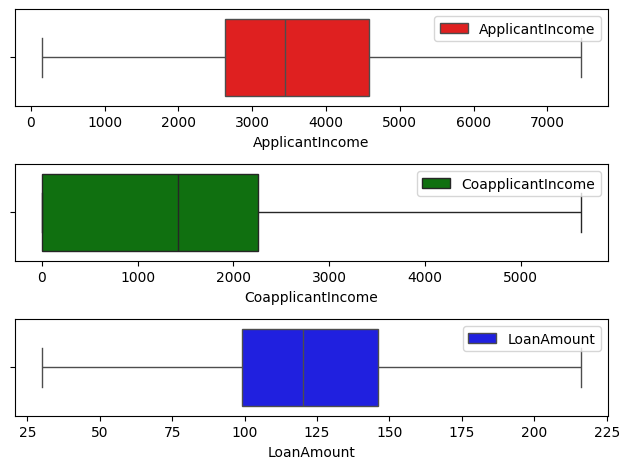

In [618]:


plt.subplot(3,1,1)
sns.boxplot(x=dataset3["ApplicantIncome"],data=dataset3,color="r",label="ApplicantIncome")

plt.subplot(3,1,2)
sns.boxplot(x=dataset3["CoapplicantIncome"],data=dataset3,color ="g",label="CoapplicantIncome") 

plt.subplot(3,1,3)
sns.boxplot(x=dataset3["LoanAmount"],data=dataset3,color="b",label="LoanAmount")

plt.legend()
plt.tight_layout()
plt.show()